In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
# https://www.kaggle.com/rishidamarla/tesla-stock-prediction-using-linear-regression/data

In [2]:
df = pd.read_csv('../db/Tesla.csv')
# # df.head()
# df = web.DataReader('BTC-USD', data_source = 'yahoo', start = '2012-01-01', end = '2021-5-17')
# df

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


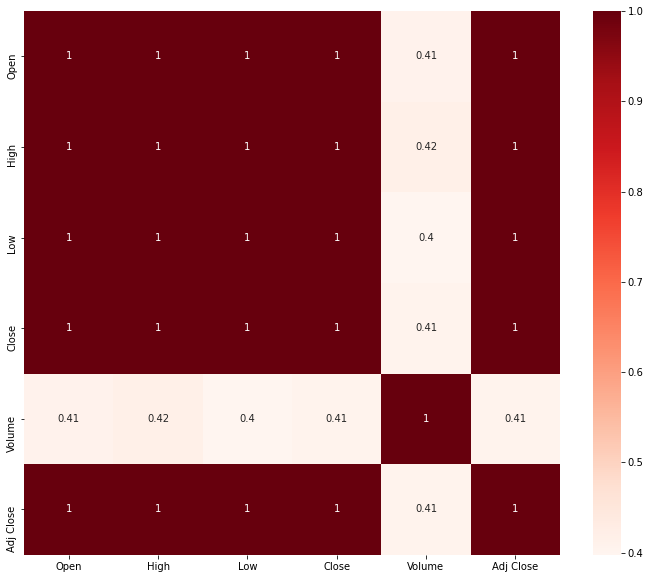

In [5]:
# feature selection
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
# x = df[['High', 'Low', 'Open']].values
x = df[['Open']].values
y = df['Close'].values

In [7]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
# x_train
test_size=0.2
num_test = int(test_size*len(df))
num_train = len(df) - num_test
# print("num_train = " + str(num_train))
# print("num_test = " + str(num_test))

# Split into train, cv, and test
train = df[:num_train]
# cv = df[num_train:num_train+num_cv]
# train_cv = df[:num_train+num_cv]
test = df[num_train:]
x_train=train["Open"].to_numpy()
x_test=test["Open"].to_numpy()
y_train=train["Close"].to_numpy()
y_test=test["Close"].to_numpy()

x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)


# print("train.shape = " + str(train.shape))
# # print("cv.shape = " + str(cv.shape))
# # print("train_cv.shape = " + str(train_cv.shape))
# print("test.shape = " + str(test.shape))

In [8]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [9]:
print(regressor.coef_)
print(regressor.intercept_)

# close= 0.85090964  *'High'+ 0.78961152 *'Low' -0.64088659*'Open' -0.006674248452014808


[[0.99932686]]
[0.06972706]


In [10]:
predicted = regressor.predict(x_test)
# print(predicted)

In [11]:
# df2['time']=df['Date']
df_temp=df.tail(num_test)
# df2[index]=df_temp.["Date"]
# df2.index=pd.to_datetime(df_temp['Date'])
# df2
# df2 = pd.DataFrame({'Close': y_test, 'Prediction' : predicted,"index" : pd.to_datetime(df_temp['Date'])})
df2 = pd.DataFrame(predicted)
df2.columns=["Prediction"]
df2["Close"]=y_test
df2.index=pd.to_datetime(df_temp['Date'])

In [12]:
df2

,Prediction,Close
Date,,
2015-11-12,217.773089,212.940002
2015-11-13,212.876379,207.190002
2015-11-16,206.020996,214.309998
2015-11-17,215.124864,214.000000
2015-11-18,214.425338,221.070007
...,...,...
2017-03-13,244.724936,246.169998
2017-03-14,246.014061,258.000000
2017-03-15,256.896730,255.729996


In [13]:
#export to csv
df2.to_csv("../out/Tesla_LinearRegression_2.csv")

In [14]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 3.427809087391744
Mean Squared Error: 20.266673996188977
Root Mean Squared Error: 4.501852285025462


<AxesSubplot:xlabel='Date'>

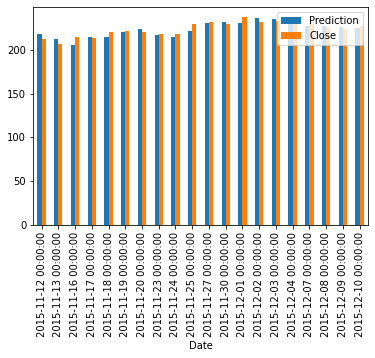

In [15]:
graph = df2.head(20)
graph.plot(kind='bar')

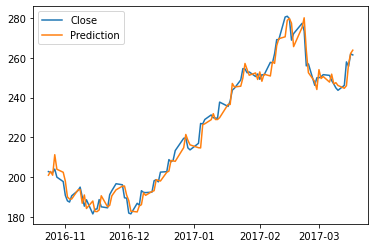

In [16]:
df3=df2.tail(100)
plt.plot(df3[['Close']], label = "Close")
plt.plot(df3[['Prediction']], label = "Prediction")
plt.legend()
plt.show()